# Logistic Regression

we will build a logistic regression model to
predict whether a student gets admitted into a university.
As the administrator of a university department and
we want to determine each applicant's chance of admission based on their
results on two exams. We have historical data from previous applicants
that we can use as a training set for logistic regression. For each training
example, we have the applicant's scores on two exams and the admissions
decision.
Our task is to build a classification model that estimates an applicant's
probability of admission based the scores from those two exams.

In [6]:
import pandas as pd
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
%matplotlib inline

In [80]:
exam_scores = pd.read_table('ex2/ex2data1.txt',sep=',',names=['exam1','exam2','decision'])
exam_scores.head()

,exam1,exam2,decision
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


We start the exercise by first plotting the data to understand the problem we are working with

In [81]:
pos=exam_scores[exam_scores['decision']==1]
neg=exam_scores[exam_scores['decision']==0]

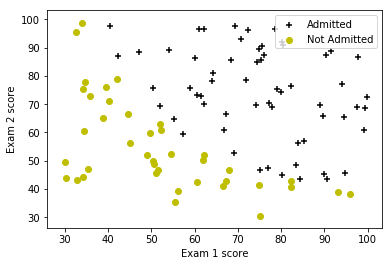

In [82]:
plt.scatter(pos['exam1'],pos['exam2'],c='k',marker='+',label='Admitted')
plt.scatter(neg['exam1'],neg['exam2'],c='y',marker='o',label='Not Admitted')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(loc=1)


<h3>Compute cost and gradient

In [83]:
def get_numpy_data(data,features,target):
    data['intercept']=1
    features = ['intercept']+features
    features_data = data[features]
    features_matrix = features_data.as_matrix()
    labels_data = data[target]
    labels_matrix = labels_data.as_matrix()
    return features_matrix, labels_matrix

In [84]:
features_matrix,labels_matrix = get_numpy_data(exam_scores,['exam1','exam2'],'decision')
#features_matrix

In [13]:
def sigmoid(z):
    z=np.array(z)
    return 1./(1+np.exp(-z))     

In [86]:
sigmoid(-25)

1.3887943864771144e-11

In [4]:
def costFunction(coef,features_matrix,labels_matrix,lamda=0):
    est = np.dot(coef,np.transpose(features_matrix))
    en = np.dot((1-labels_matrix),np.log(1-sigmoid(est)))
    ep=np.dot(labels_matrix,np.log(sigmoid(est)))
    p = (lamda*np.dot(coef,np.transpose(coef)))/(2*len(features_matrix))
    cost = float(-(en+ep))/len(features_matrix) + p
    
    return cost
def computeDerivative(coef,features_matrix,labels_matrix,lamda=0):
    est = np.dot(coef,np.transpose(features_matrix))
    derivative = []
    error = sigmoid(est) - labels_matrix
    for j in xrange(len(coef)):
        if j==0:d=float(np.dot(error,features_matrix[:,j]))/len(features_matrix)
        else:
            pd=float(lamda*coef[j])/len(features_matrix)
            d = float(np.dot(error,features_matrix[:,j]))/len(features_matrix)+pd
        derivative.append(d)
    return np.array(derivative)

In [111]:
ini_cost=costFunction(np.zeros(3),features_matrix,labels_matrix)
ini_dev = computeDerivative(np.zeros(3),features_matrix,labels_matrix)
print 'Cost at initial coef (zeros): %f'%ini_cost
print 'Expected cost (approx): 0.693'
print 'Gradient at initial theta (zeros):'
print '{}'.format(ini_dev)
print 'Expected gradients (approx):\n -0.1000\n -12.0092\n -11.2628'

Cost at initial coef (zeros): 0.693147
Expected cost (approx): 0.693
Gradient at initial theta (zeros):
[-0.1, -12.00921658929115, -11.262842205513593]
Expected gradients (approx):
 -0.1000
 -12.0092
 -11.2628


<h3> Optimization

In [52]:
def optimizer(features_matrix,labels_matrix,coef,iters=400):
    coef_opt = opt.fmin(costFunction,x0 = coef, args=(features_matrix,labels_matrix),maxiter=iters)
    return coef_opt

In [53]:
coef_opt = optimizer(features_matrix,labels_matrix,np.zeros(3))
coef_opt

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 157
         Function evaluations: 287


array([-25.16130062,   0.20623142,   0.20147143])

<h3> Plotting Decision Boundary

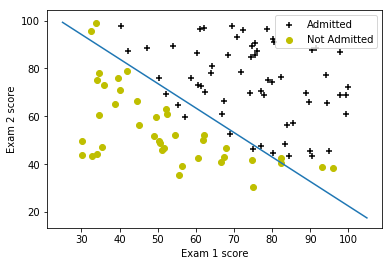

In [75]:
x_d =[features_matrix[:,1].min()-5,features_matrix[:,1].max()+5]
y_d = (coef_opt[0]+(coef_opt[1]*np.array(x_d)))/float(-coef_opt[2])
plt.plot(x_d,y_d)
plt.scatter(pos['exam1'],pos['exam2'],c='k',marker='+',label='Admitted')
plt.scatter(neg['exam1'],neg['exam2'],c='y',marker='o',label='Not Admitted')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(loc=1)

<h3> Predict and accuracy

After learning the parameters, we will like to use it to predict the outcomes on unseen data. In this part, we will use the logistic regression model to predict the probability that a student with score 45 on exam 1 and score 85 on exam 2 will be admitted.
Furthermore, we will compute the training and test set accuracies of our model.

In [109]:
prob = sigmoid(np.dot([1, 45, 85],coef_opt))
print 'for a student with scores 45 and 85, we predict an admission probability of %f'%(prob)
print 'Expected value: 0.775 +/- 0.002'

for a student with scores 45 and 85, we predict an admission probability of 0.776292
Expected value: 0.775 +/- 0.002


In [24]:
def predict(coef_opt,features_matrix):
    est = np.dot(coef_opt,np.transpose(features_matrix))
    prob = sigmoid(est)
    predictions =  np.repeat(0,len(features_matrix))
    predictions[prob>=0.5]=1
    #print predictions
    return predictions

In [107]:
pred = np.array(predict(coef_opt,features_matrix))
acc = (pred==labels_matrix).sum()
score = float(acc)/len(labels_matrix)
print 'Train Accuracy: %f'%score
print 'Expected accuracy (approx): 0.89'

Train Accuracy: 0.890000
Expected accuracy (approx): 0.89


# Regularized logistic regression
In this part, we will implement regularized logistic regression to predict whether microchips from a fabrication plant passes quality assurance (QA). During QA, each microchip goes through various tests to ensure
it is functioning correctly. 
Suppose we have the
test results for some microchips on two different tests. From these two tests,
we would like to determine whether the microchips should be accepted or
rejected. To help make the decision, we have a dataset of test results
on past microchips, from which we can build a logistic regression model.


In [7]:
ic_test = pd.read_table('ex2/ex2data2.txt',sep=',',names=['test1','test2','decision'])
ic_test.head()

,test1,test2,decision
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [8]:
pos_test=ic_test[ic_test['decision']==1]
neg_test=ic_test[ic_test['decision']==0]

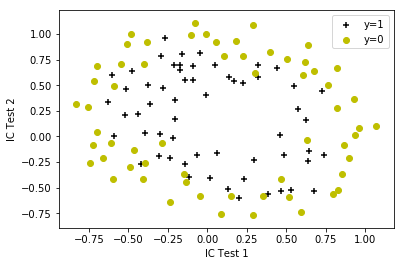

In [6]:
plt.scatter(pos_test['test1'],pos_test['test2'],c='k',marker='+',label='y=1')
plt.scatter(neg_test['test1'],neg_test['test2'],c='y',marker='o',label='y=0')
plt.xlabel('IC Test 1')
plt.ylabel('IC Test 2')
plt.legend(loc=1)

In [9]:
labels_matrix_reg = ic_test['decision'].as_matrix()
features_matrix_reg = ic_test[['test1','test2']].as_matrix()

# Feature Transformation
In this dataset data points are notlinearly separable. However, we would still like to use logistic regression to classify the data points.<br>
To do so, we introduce more features to use -- in particular, we add polynomial features to our data matrix


In [10]:
def mapFeature(X1,X2,degree=6):
    o=np.ones(len(X1))
    
    for i in range(1,degree+1):    
        for j in range(0,i+1):
            f1 = np.power(X1,i-j)
            f2 = np.power(X2,j)            
            f = np.multiply(f1,f2)          
            o=np.c_[o,f]
    return o

In [11]:
features_extend = mapFeature(features_matrix_reg[:,0],features_matrix_reg[:,1])
print features_extend.shape
print features_matrix_reg.shape
#features_extend

(118L, 28L)
(118L, 2L)


<h3>Compute and display initial cost and gradient for regularized logistic regression

In [18]:
p = 1
ini_cost=costFunction(np.zeros(28),features_extend,labels_matrix_reg,p)
ini_dev=computeDerivative(np.zeros(28),features_extend,labels_matrix_reg,p)
print 'Cost at initial theta (zeros): %f' %ini_cost
print 'Expected cost (approx): 0.693'
print 'Gradient at initial theta (zeros) - first five values only:'
print '{}'.format(ini_dev[:5])
print 'Expected gradients (approx) - first five values only:'
print '0.0085 0.0188 0.0001 0.0503 0.0115'

Cost at initial theta (zeros): 0.693147
Expected cost (approx): 0.693
Gradient at initial theta (zeros) - first five values only:
[  8.47457627e-03   1.87880932e-02   7.77711864e-05   5.03446395e-02
   1.15013308e-02]
Expected gradients (approx) - first five values only:
0.0085 0.0188 0.0001 0.0503 0.0115


In [19]:
p = 10
ini_cost=costFunction(np.ones(28),features_extend,labels_matrix_reg,p)
ini_dev=computeDerivative(np.ones(28),features_extend,labels_matrix_reg,p)
print 'Cost at test theta (with lamda=10): %f' %ini_cost
print 'Expected cost (approx): 3.16'
print 'Gradient at test theta (zeros) - first five values only:'
print '{}'.format(ini_dev[:5])
print 'Expected gradients (approx) - first five values only:'
print ' 0.3460 0.1614 0.1948 0.2269 0.0922'

Cost at test theta (with lamda=10): 3.206882
Expected cost (approx): 3.16
Gradient at test theta (zeros) - first five values only:
[ 0.34604507  0.16135192  0.19479576  0.22686278  0.09218568]
Expected gradients (approx) - first five values only:
 0.3460 0.1614 0.1948 0.2269 0.0922


<h3>Optimization

In [88]:
def optimizer_reg(features_matrix,labels_matrix,coef,lamda,iters=400):
    coef_opt = opt.fmin_bfgs(costFunction,x0 = coef, args=(features_matrix,labels_matrix,lamda),maxiter=iters)
    return coef_opt

In [89]:
p=1
coef_opt = optimizer_reg(features_extend,labels_matrix_reg,np.zeros(28),p)
coef_opt

Optimization terminated successfully.
         Current function value: 0.535160
         Iterations: 46
         Function evaluations: 1410
         Gradient evaluations: 47


array([ 1.14216809,  0.60159647,  1.16719559, -1.87133889, -0.91585539,
       -1.27009734,  0.12635786, -0.36845917, -0.34493788, -0.17359455,
       -1.4238617 , -0.0489703 , -0.60654126, -0.26932598, -1.16298495,
       -0.2435413 , -0.20689091, -0.0433885 , -0.28027268, -0.28676085,
       -0.46905379, -1.03650762,  0.02900068, -0.29266107,  0.01716401,
       -0.32900567, -0.13798779, -0.93193432])

<h3>accessing model performance

In [91]:
pred = np.array(predict(coef_opt,features_extend))
acc = (pred==labels_matrix_reg).sum()
score = float(acc)/len(labels_matrix_reg)
print 'Train Accuracy: %f'%score
print 'Expected accuracy (approx): 0.83'

Train Accuracy: 0.813559
Expected accuracy (approx): 0.83


In [62]:
xx = np.arange(-1,1.5,0.005)
yy = np.arange(-1,1.5,0.005)
xx, yy = np.meshgrid(xx,yy)
zz  = np.dot(mapFeature(xx.ravel(),yy.ravel()),coef_opt)
zz = zz.reshape(xx.shape)

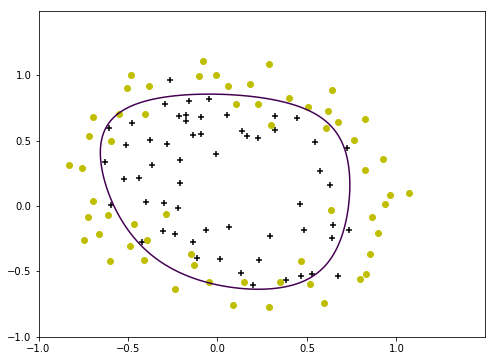

In [90]:
pylab.rcParams['figure.figsize'] = (8, 6)
plt.contour(xx,yy,zz,levels=[0])
plt.scatter(pos_test['test1'],pos_test['test2'],c='k',marker='+',label='y=1')
plt.scatter(neg_test['test1'],neg_test['test2'],c='y',marker='o',label='y=0')

In [29]:
def plotdata(data):
    pos_test=data[data['decision']==1]
    neg_test=data[data['decision']==0]
    plt.scatter(pos_test['test1'],pos_test['test2'],c='k',marker='+',label='y=1')
    plt.scatter(neg_test['test1'],neg_test['test2'],c='y',marker='o',label='y=0')
    plt.xlabel('IC Test 1')
    plt.ylabel('IC Test 2')
    plt.legend(loc=1)

In [31]:
def plotdecisionboundry(coef_decision):
    xx = np.arange(-1,1.5,0.005)
    yy = np.arange(-1,1.5,0.005)
    xx, yy = np.meshgrid(xx,yy)
    zz  = np.dot(mapFeature(xx.ravel(),yy.ravel()),coef_decision)
    zz = zz.reshape(xx.shape)
    plt.contour(xx,yy,zz,levels=[0])
    

In [92]:
%pylab inline
pylab.rcParams['figure.figsize'] = (18, 8)

Populating the interactive namespace from numpy and matplotlib


         Current function value: 0.263502
         Iterations: 400
         Function evaluations: 12030
         Gradient evaluations: 401
Optimization terminated successfully.
         Current function value: 0.535160
         Iterations: 46
         Function evaluations: 1410
         Gradient evaluations: 47
Optimization terminated successfully.
         Current function value: 0.651183
         Iterations: 19
         Function evaluations: 600
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 0.686527
         Iterations: 4
         Function evaluations: 150
         Gradient evaluations: 5


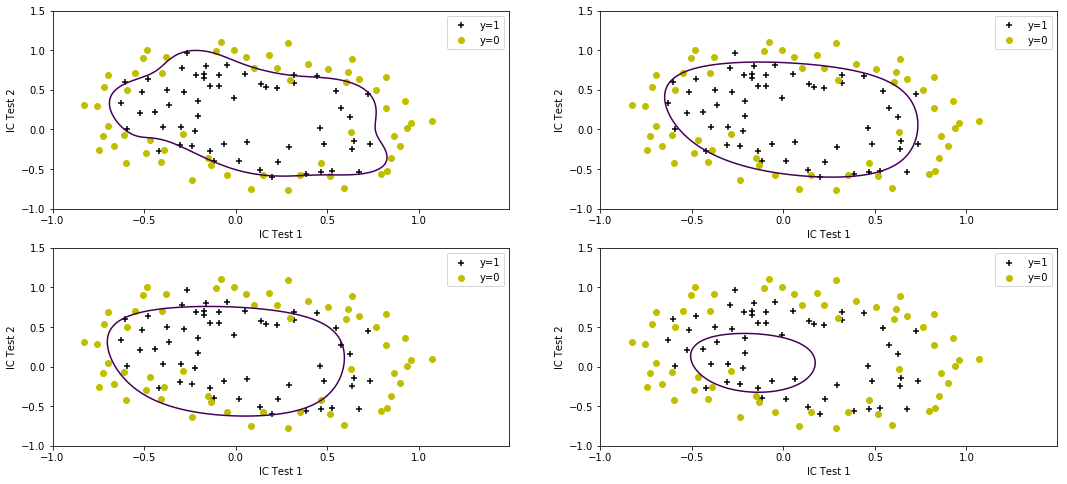

In [93]:
p=0
coef_opt = optimizer_reg(features_extend,labels_matrix_reg,np.zeros(28),p)
plt.subplot(2,2,1)
plotdata(ic_test)
plotdecisionboundry(coef_opt)
p=1
coef_opt = optimizer_reg(features_extend,labels_matrix_reg,np.zeros(28),p)
plt.subplot(2,2,2)
plotdata(ic_test)
plotdecisionboundry(coef_opt)
p=10
coef_opt = optimizer_reg(features_extend,labels_matrix_reg,np.zeros(28),p)
plt.subplot(2,2,3)
plotdata(ic_test)
plotdecisionboundry(coef_opt)
p=100
coef_opt = optimizer_reg(features_extend,labels_matrix_reg,np.zeros(28),p)
plt.subplot(2,2,4)
plotdata(ic_test)
plotdecisionboundry(coef_opt)